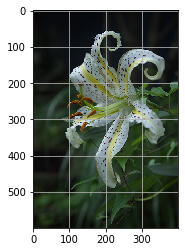

In [59]:
from PIL import Image
import numpy as np
from urllib.request import urlopen
from matplotlib import pyplot as plt

# im = Image.open(urlopen('https://codeandlife.com/wp-content/uploads/2019/07/pistore-8-768x654.jpg'))
im = Image.open('sample2.png') # For local files
# im

temp = plt.imread('sample2.png')
plt.grid()
plt.imshow(temp)

In [60]:
data = np.asarray(im)[:, :, :3]
data.shape

(600, 400, 3)

In [62]:
#original
# refpos = (550,360) # top left corner
# refsize = (32,32) # reference sample size

#my sample
refpos = (200,100) # top left corner
refsize = (25,25) # reference sample size

sub = data[refpos[0]:refpos[0]+refsize[0],refpos[1]:refpos[1]+refsize[1]][:, :, :3]
Image.fromarray(sub)

In [63]:
c = list(np.mean(sub[:,:,i]) for i in range(3))
c

[54.2464, 69.0976, 58.3552]

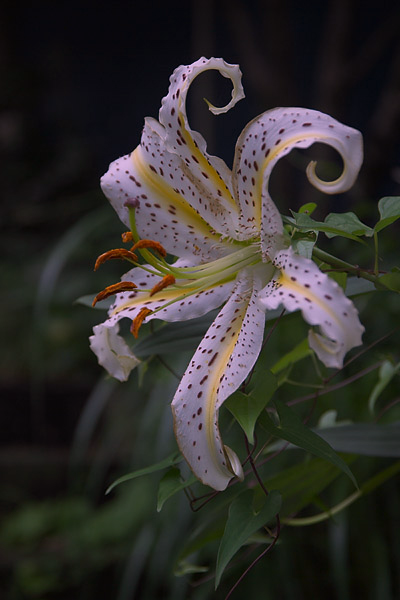

In [64]:
wb = data.astype(float)

# RGB scaling just decreases oversaturated components to get average grey
# See https://en.wikipedia.org/wiki/Color_balance

for i in range(3): wb[:,:,i] /= c[i]/float(min(c))
    
Image.fromarray(wb.astype(np.uint8))

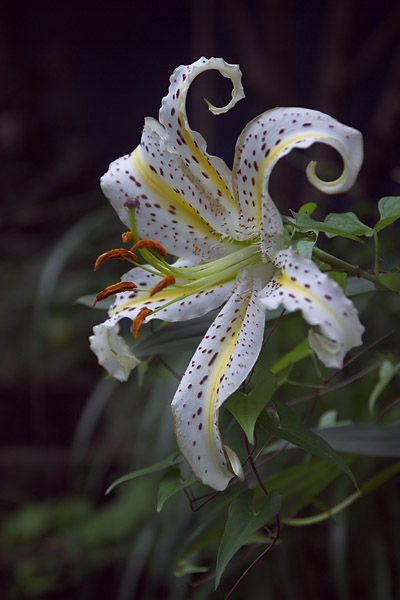

In [67]:
# Conversion functions courtesy of https://stackoverflow.com/a/34913974/2721685
def rgb2ycbcr(im):
    xform = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    ycbcr = im.dot(xform.T)
    ycbcr[:,:,[1,2]] += 128
    return ycbcr #np.uint8(ycbcr)

def ycbcr2rgb(im):
    xform = np.array([[1, 0, 1.402], [1, -0.34414, -.71414], [1, 1.772, 0]])
    rgb = im.astype(np.float)
    rgb[:,:,[1,2]] -= 128
    rgb = rgb.dot(xform.T)
    np.putmask(rgb, rgb > 255, 255)
    np.putmask(rgb, rgb < 0, 0)
    return np.uint8(rgb)

# Convert data and sample to YCbCr
ycbcr = rgb2ycbcr(data)
ysub = rgb2ycbcr(sub)

# Calculate mean components
yc = list(np.mean(ysub[:,:,i]) for i in range(3))

# Center cb and cr components of image based on sample
for i in range(1,3):
    ycbcr[:,:,i] = np.clip(ycbcr[:,:,i] + (128-yc[i]), 0, 255)

rgb = ycbcr2rgb(ycbcr) # Convert back
Image.fromarray(rgb).save('sample2_test.png')
Image.fromarray(rgb)